LOAN STATUS PREDICTION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
loan_dataset=pd.read_csv("loan.csv")

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
loan_dataset.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
loan_dataset.shape

(614, 13)

In [9]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_dataset=loan_dataset.dropna()

In [12]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan_dataset.replace({"Loan_Status":{'Y':1,'N':0}},inplace=True)

In [14]:
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


In [15]:
loan_dataset.replace({"Dependents":{'1':1,'2':2,'3':3,'3+':4}},inplace=True)

In [16]:
loan_dataset.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,1
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,1
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,1
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [17]:
loan_dataset.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          0              1
LP001005  Male    Yes      0           Graduate      Yes            3000             0.0                66.0        360.0             1.0             Urban          1              1
LP002347  Male    Yes      0           Graduate      No             3246             1417.0             138.0       360.0             1.0             Semiurban      1              1
LP002345  Male    Yes      0           Graduate      No             1025             2773.0             112.0       360.0             1.0             Rural          1              1
LP002342  Male    Yes      2           Graduate      Yes            1600             20000.0   

In [18]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

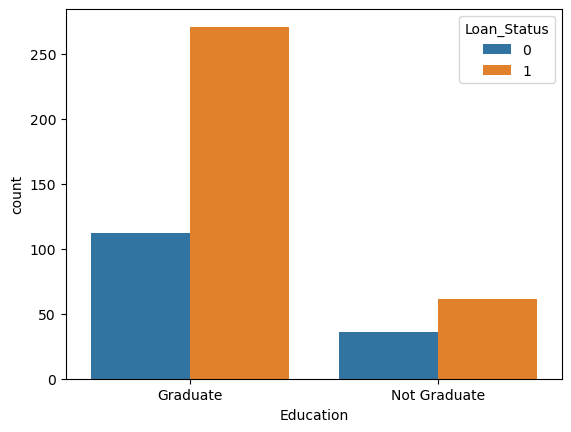

In [19]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

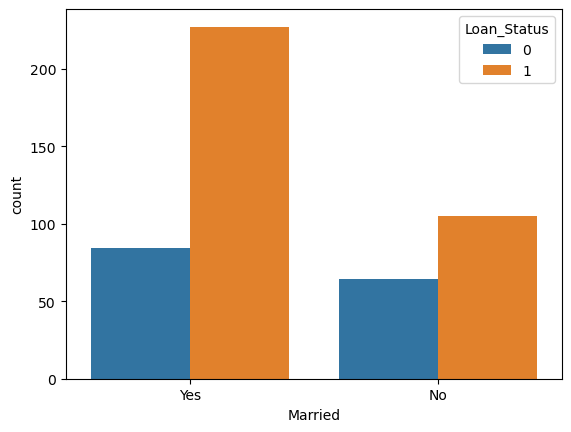

In [20]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

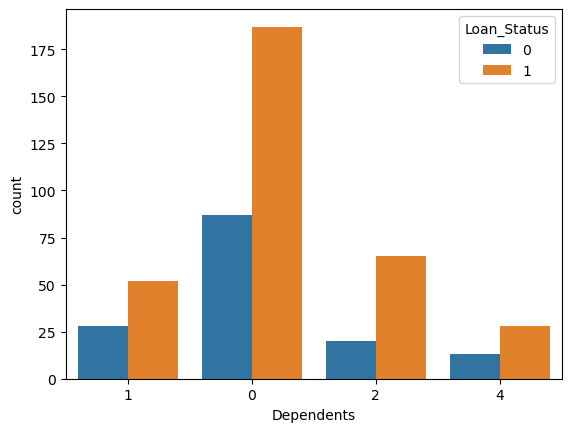

In [21]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

In [22]:
loan_dataset.replace({"Married":{'Yes':1,'No':0}},inplace=True)

In [23]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,1,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,1,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,1,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,1,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,Male,1,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


In [24]:
loan_dataset['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [25]:
loan_dataset.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

In [26]:
loan_dataset.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

In [27]:
loan_dataset.replace({"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [28]:
loan_dataset.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [29]:
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


seperating features and labels

In [30]:
x=loan_dataset.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y=loan_dataset['Loan_Status']

In [31]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [32]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [34]:
print(x_train.shape,x.shape,x_test.shape)

(432, 11) (480, 11) (48, 11)


In [35]:
classifier=svm.SVC(kernel='linear')

In [36]:
from sklearn.linear_model import LogisticRegression


In [37]:
model=LogisticRegression()

In [38]:
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
x_train_prediction=model.predict(x_test)

In [40]:
training_data_accuracy=accuracy_score(x_train_prediction,y_test)

In [41]:
print(training_data_accuracy)

0.8333333333333334


In [59]:
input_data=(0,0,0,0,0,4583,1508,128,36,0,0
)

In [60]:
input_data_nparray=np.asarray(input_data)
input_data_nparray_reshape=input_data_nparray.reshape(1,-1)

In [61]:
prediction=model.predict(input_data_nparray_reshape)
if(prediction[0]==1):
    print("Loan ==yes")
else:
    print("Loan==No")

Loan==No


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
